In [1]:
def displayBarChart(xArray,yArray,title):

    objects=tuple(xArray)
    performance=yArray
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('count')
    plt.title(title)
    plt.show()
    print(objects,performance)



def displayBarChartOfCountColumn(data,colName):
    #newData=data
    #da
    uniqueValuesArray=data[colName].unique().tolist()
    objects=tuple(uniqueValuesArray)
    performance=[]
    for element in uniqueValuesArray:
        if(not (nan in [element])):
            count=data[data[colName]==element].count()[0]
        else:
            count=data[colName].isnull().sum()
        
        performance.append(count)

    y_pos = np.arange(len(objects))
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('values')
    plt.title(colName+" attributes")
    
    plt.show()
    print(objects,performance)
    
    
def missingValuesDisplay(data):
    missing_values_count_reviews = data.isnull().sum()
    totalRows=data.shape[0]
    totalColumns=data.shape[1]
    return missing_values_count_reviews


def analysisPriceCol(data):
    array=[]
    uniquePriceColData=data['Price'].unique().tolist()
    for element in uniquePriceColData :
        if(not ('$' in element)):
            array.append(element)
    print("the exceptional values are")
    return array

def deleteAllColumnsAgg(data,colName):
    i=0
    for element in data.columns:
        if(element!=colName and i!=0):
            del data[element]
        i+=1
 
def shiftCells(data,rowNumber,index):
    array=[]
    for col in data.columns:
        array.append((data.iloc[rowNumber])[col])

    for i in range(len(array)):
        if(i==index):
            data.at[rowNumber,data.columns[i]]=nan
        if(i>index):
            data.at[rowNumber,data.columns[i]]=array[i-1]

import play_scraper
def handleMissingValues(data,colName):
    fields={'App' : 'title','Category' : 'category','Rating' : 'score' ,'Size' : 'size','Reviews':'reviews',
            'Price':'price','Installs': 'installs','Content Rating':'content_rating',
            'Last Updated':'updated','Current Ver':'current_version','Android Ver':'required_android_version'}
    missingRecordsCR=data[data[colName].isnull()]
    rowNumber=data.loc[data[colName].isnull()].index.tolist() 
    count=0
    for i in range(missingRecordsCR.shape[0]): 
        title=data.iloc[rowNumber[i],0]
        
        app_id=play_scraper.search(title, page=1)
        size=len(app_id)
        if(size>0):
            app_id=app_id[0]["app_id"]
        info=play_scraper.details(app_id)
        #print(title,info['title'])
        if( size >0 and (info['title'] in title or title in info['title'] ) ):
            googleColName=fields[colName]
            data.at[rowNumber[i],colName]=info[googleColName]
            count+=1

    print("count of updated values",count)


In [2]:
def findIndexSybol(string,symb):
    for i in range(len(string)):
        if(string[i]==symb):
            return i
    return -1

def normalizeValues(table,colName):
    
    array=[]
    for i in range(table.shape[0]):

        rowValue=int(table[colName][i])
        rowString=str(rowValue)
        size=len(rowString)
       
        if(size>12 ):
            print(rowString)
        if( size>3 and size<=6 ):
            value=rowValue//1000
            array.append(str(value)+"K")
        elif( size>6 and size<=9 ):
            value=rowValue//(10**6)
            array.append(str(value)+"M")
        elif( size>9 and size<=12 ):
            value=rowValue//(10**9)
            array.append(str(value)+"B")
        else:
            #print("here",rowString)
            array.append(str(rowValue)+"U")
    #table[colName]=str(table[colName])    
    table[colName]=array

def dvividenormalizeValues(table,colName,colName2):
    
    array=[]
    for i in range(table.shape[0]):
        rowString=table[colName][i]
        symbol=rowString[-1]
        rowString=rowString[0:len(rowString)-1]
        try:
            value=round(int(rowString)/int(table[colName2][i]),3)
            if(value<1):
                value=value*1000
                if(symbol=="M"):
                    symbol="K"
                elif(symbol=="B"):
                    symbol="M"
                else:
                    symbol="U"
            array.append(str(value)+symbol)
        except:
            array.append(0)
    table[colName+"/"+colName2]=array   
    
    
def normalizeArray(CategoryArray,colName):
    
    outputArray=[]
    for category in CategoryArray:
        records=(data[(data[colName]==category) & (data["Size"]!="Varies with device")])["Size"]
        numberArray=[]
        VarieswithDeviceFlag=False
        for rowValue in records:
            symb=rowValue[-1]
            rowString=rowValue[0:len(rowValue)-1]
            if(symb=="k"):
                val=float(rowString)*1000
                numberArray.append(val)
            elif(symb=="m"):
                val=float(rowString)*(10**6)
                numberArray.append(val)
            else:
                VarieswithDeviceFlag=True
            
        
        output=""
        if(len(numberArray)>0):
            avg=int(sum(numberArray)/len(numberArray))
            size=len(str(avg))
            if( size>3 and size<=6 ):
                value=avg//1000
                output=str(value)+"K"
            elif( size>6 and size<=9 ):
                value=avg//(10**6)
                output=str(value)+"M"
            elif( size>9 and size<=12 ):
                value=avg//(10**9)
                output=str(value)+"B"
            else:
                output=str(rowValue)+"U"
            
        if(VarieswithDeviceFlag):
            output=output+"e"

        if(not (nan in [category])):
            outputArray.append(output)
            
    return outputArray

In [3]:
def avgPaidPricePerCategory(data,groupedCR,colName):
    array=[]
    for i in range(groupedCR.shape[0]):
        if(not (nan in [groupedCR[colName][i]])):
            miniData=data[(data["Price"]!=0) & (data[colName]==groupedCR[colName][i])]
            sumo=miniData["Price"].sum()
            size=len(miniData)
            value=sumo/size
            #if(i==2):
                #print(value,sumo,size,uniqueList[i])
            if(sumo!=0):
                array.append(round(value,2))
            else:
                array.append(0)
    return array

def adjustSizeCol(table,colName,flag=True):
    
    array=[]
    for i in range(table.shape[0]):

        rowValue=table[colName][i]
        symb=rowValue[-1]
        rowString=rowValue[0:len(rowValue)-1]
        
        if(symb=="k"):
            val=float(rowString)*1000
            array.append(val)
        elif(symb=="m"):
            val=float(rowString)*(10**6)
            array.append(val)
        else:
            array.append(-1)
    #table[colName]=str(table[colName])    
    if(flag):
        table["New"+colName]=array
    else:
        table[colName]=array


def createFailureCol(data,thresHoldYear):
    col=[]
    for i in range(data.shape[0]):
        row=(data.iloc[i])["Last Updated"]
        array=row.split(',')
        year=int(array[1].replace(" ",""))
        if(year<=thresHoldYear):
            col.append("Fail")
        else:
            col.append("Safe")
    return col

def impute_mean(series):
    return series.fillna(series.mean())

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import nan
import scipy.stats as st


data = pd.read_csv("google-play-store-apps/googleplaystore.csv")
data = data.drop_duplicates()
data.reset_index(drop=True,inplace=True)
data.head()
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10358 entries, 0 to 10357
Data columns (total 13 columns):
App               10358 non-null object
Category          10358 non-null object
Rating            8893 non-null float64
Reviews           10358 non-null object
Size              10358 non-null object
Installs          10358 non-null object
Type              10357 non-null object
Price             10358 non-null object
Content Rating    10357 non-null object
Genres            10358 non-null object
Last Updated      10358 non-null object
Current Ver       10350 non-null object
Android Ver       10355 non-null object
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [5]:
data.head(1000)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


### Checking count and percentage of missing values

In [6]:
#missingValuesDisplay(data)
missingTemp = data.isnull().sum()
missing_value_df_app = pd.DataFrame({'missing_count': missingTemp, 'missing_percent': missingTemp * 100 / len(data)})
missing_value_df_app

,missing_count,missing_percent
App,0,0.000000
Category,0,0.000000
Rating,1465,14.143657
Reviews,0,0.000000
Size,0,0.000000
Installs,0,0.000000
Type,1,0.009654
Price,0,0.000000
Content Rating,1,0.009654
Genres,0,0.000000


In [7]:
# handle case of zero value column type
missingRecordsType=data[data['Type'].isnull()]
uniqueTypeColData=data['Type'].unique().tolist()
appCol=data.groupby('Type',as_index = False).count()
deleteAllColumnsAgg(appCol,'App')
missingValuesType = data['Type'].isnull().sum()
print(uniqueTypeColData)

appCol

['Free', 'Paid', nan, '0']


,Type,App
0,0,1
1,Free,9591
2,Paid,765


In [8]:
row_index = data.loc[data['Type']=='0'].index[0]
row_index
print("we need to shift the data values at row", row_index)
data[data['Type']=='0']



we need to shift the data values at row 9990


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9990,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [9]:
shiftCells(data,row_index,1)
print("we shift the data values at row ", row_index, " and this is why category became null value")
rec=data.iloc[row_index]
rec

we shift the data values at row  9990  and this is why category became null value


App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                                19
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 9990, dtype: object

In [10]:
# handle case of null value
missingRecordsType=data[data['Type'].isnull()]
uniqueTypeColData=data['Type'].unique().tolist()
print(uniqueTypeColData)
missingRecordsType

['Free', 'Paid', nan]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8667,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [11]:
data[data['Type']=='Free']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [12]:
data[data['Type']=='Paid']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
233,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
234,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
390,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,$3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
429,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,"10,000+",Paid,$3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up
430,Calculator,DATING,2.6,57,6.2M,"1,000+",Paid,$6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up
431,Truth or Dare Pro,DATING,NaN,0,20M,50+,Paid,$1.49,Teen,Dating,"September 1, 2017",1.0,4.0 and up
432,"Private Dating, Hide App- Blue for PrivacyHider",DATING,NaN,0,18k,100+,Paid,$2.99,Everyone,Dating,"July 25, 2017",1.0.1,4.0 and up
433,Ad Blocker for SayHi,DATING,NaN,4,1.2M,100+,Paid,$3.99,Teen,Dating,"August 2, 2018",1.2,4.0.3 and up
434,AMBW Dating App: Asian Men Black Women Interra...,DATING,3.5,2,17M,100+,Paid,$7.99,Mature 17+,Dating,"January 21, 2017",1.0.1,4.0 and up
507,"Moco+ - Chat, Meet People",DATING,4.2,1546,Varies with device,"10,000+",Paid,$3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up


In [13]:
print("we can conclude that price and type are related and type of free is given for price of zero")
print("Type is a driven column from price column")

data.at[9148,'Type']='Free'
missingRecordsType=data[data['Type'].isnull()]
uniqueTypeColData=data['Type'].unique().tolist()
print(uniqueTypeColData)
data=data.replace({'Price': '0'}, '$0')
missingRecordsType


we can conclude that price and type are related and type of free is given for price of zero
Type is a driven column from price column
['Free', 'Paid', nan]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8667,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [14]:
missingValuesDisplay(data)

App                  0
Category             1
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

### Handle missing category data through scraping the play store itself to find the correct information

In [15]:
missingRecords=data[data['Category'].isnull()]
missingRecords

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9990,Life Made WI-Fi Touchscreen Photo Frame,NaN,1.9,19,3.0M,"1,000+",Free,$0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


In [16]:
handleMissingValues(data,'Category')
missingValuesDisplay(data)

count of updated values 1


App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

### Impute missing ratings by calculating mean of ratings grouped by number of installs
#### The reasoning behind this is that a more popular application (More installs) would likely have a higher rating and vice-versa

### Also dropping records with number of installs equal to zero, as these cannot be evaluated in any way and have no ratings

In [17]:
# handle Rating 
temp = data.groupby(['Installs'])

# Write a function that imputes median
#def impute_mean(series):
    #return series.fillna(series.mean())

# Impute age and assign to titanic.age
# temp.transform(impute_median)
datacopy = data.copy()
datacopy['Rating'] = temp.transform(impute_mean)
datacopy = datacopy.drop(datacopy[((datacopy['Installs'] == '0') | (datacopy['Installs'] == '0+'))].index)
datacopy['Rating'].isna().sum()

0

In [18]:
data=datacopy
missingValuesDisplay(data)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            1
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

### Dropping any remaining records with null values in them due to the insignifcance of their quantity

In [19]:
# we will choose to delete all remaining null values
data=data.dropna()
missingValuesDisplay(data)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

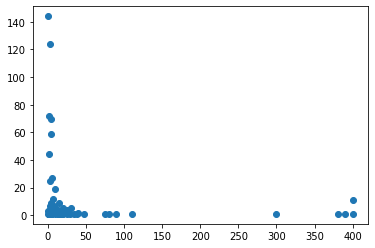

In [20]:
#omar
# this is visulaization
data=data.replace({'Price': '0'}, '$0')
priceCol=data.groupby(['Price'],as_index = False).count()
deleteAllColumnsAgg(priceCol,'App')
priceCol['Price']=priceCol['Price'].str[1:]
priceCol['Price'] = priceCol['Price'].astype(float)
priceCol=priceCol.drop([0])
plt.scatter(priceCol['Price'], priceCol['App'])

#plt.plot(priceCol['Price'], priceCol['App'], 'ro')
plt.show()
#displayBarChart(priceCol['Price'],priceCol['App'],'Title') 

In [21]:
# analysis Type Column
#data = pd.read_csv("google-play-store-apps/googleplaystore.csv") 
data=data.replace({'Price': '0'}, '$0')
data['Price']=data['Price'].str[1:]
data['Price'] = data['Price'].astype(float)
data['Reviews'] = data['Reviews'].astype(float)
data['InstallsApprox']=data['Installs'].str.replace('+', '')
data['InstallsApprox']=data['InstallsApprox'].str.replace(',', '')
data['InstallsApprox']=data['InstallsApprox'].astype(float)


In [22]:
groupedType = data.groupby(["Category","Type"],as_index=False)

# Compute mean per group using agg function
groupedType=groupedType.agg({"InstallsApprox":"sum","App":"count"},as_index=False)
groupedType = groupedType.pivot_table(index=["Category"], columns="Type", values=["App","InstallsApprox"])
groupedType.reset_index(drop=False, inplace=True)
groupedType=groupedType.fillna(0)
#groupedType
groupedType.columns = ['Category','FreeApp','PaidApp',"FreeInstalls","PaidInstalls"]
groupedType = groupedType[['Category','FreeApp',"FreeInstalls",'PaidApp',"PaidInstalls"]]
groupedType["InstallsApprox"]=groupedType["FreeInstalls"]+groupedType["PaidInstalls"]
groupedType["App"]=groupedType["FreeApp"]+groupedType["PaidApp"]
print(groupedType["InstallsApprox"].dtype)
groupedType

float64


,Category,FreeApp,FreeInstalls,PaidApp,PaidInstalls,InstallsApprox,App
0,ART_AND_DESIGN,60.0,1.243171e+08,3.0,16000.0,1.243331e+08,63.0
1,AUTO_AND_VEHICLES,82.0,5.308006e+07,3.0,50150.0,5.313021e+07,85.0
2,BEAUTY,53.0,2.719705e+07,0.0,0.0,2.719705e+07,53.0
3,BOOKS_AND_REFERENCE,201.0,1.916445e+09,28.0,23316.0,1.916469e+09,229.0
4,BUSINESS,414.0,8.634521e+08,12.0,212775.0,8.636649e+08,426.0
5,COMICS,60.0,5.608615e+07,0.0,0.0,5.608615e+07,60.0
6,COMMUNICATION,339.0,2.415092e+10,27.0,1360050.0,2.415228e+10,366.0
7,DATING,189.0,2.065148e+08,7.0,21350.0,2.065361e+08,196.0
8,EDUCATION,126.0,5.333500e+08,4.0,602000.0,5.339520e+08,130.0
9,ENTERTAINMENT,109.0,2.455460e+09,2.0,200000.0,2.455660e+09,111.0


In [23]:
table=groupedType

#table["Ratio"]=table["FreeInstalls"]//table["PaidInstalls"]    
normalizeValues(table,"InstallsApprox")
normalizeValues(table,"FreeInstalls")
normalizeValues(table,"PaidInstalls")
table

dvividenormalizeValues(table,"InstallsApprox","App")
dvividenormalizeValues(table,"FreeInstalls","FreeApp")
dvividenormalizeValues(table,"PaidInstalls","PaidApp")


print('InstallsApprox/App',"equilvalent to",'IAA')
print('FreeInstalls/FreeApp',"equilvalent to",'FIFP')
print("PaidInstalls/PaidApp","equilvalent to","PIPA")
table.rename(columns={'InstallsApprox/App' : 'IAA','FreeInstalls/FreeApp' : 'FIFP',"PaidInstalls/PaidApp" : "PIPA"},inplace=True)


table

InstallsApprox/App equilvalent to IAA
FreeInstalls/FreeApp equilvalent to FIFP
PaidInstalls/PaidApp equilvalent to PIPA


,Category,FreeApp,FreeInstalls,PaidApp,PaidInstalls,InstallsApprox,App,IAA,FIFP,PIPA
0,ART_AND_DESIGN,60.0,124M,3.0,16K,124M,63.0,1.968M,2.067M,5.333K
1,AUTO_AND_VEHICLES,82.0,53M,3.0,50K,53M,85.0,624.0K,646.0K,16.667K
2,BEAUTY,53.0,27M,0.0,0U,27M,53.0,509.0K,509.0K,0
3,BOOKS_AND_REFERENCE,201.0,1B,28.0,23K,1B,229.0,4.0M,5.0M,821.0U
4,BUSINESS,414.0,863M,12.0,212K,863M,426.0,2.026M,2.085M,17.667K
5,COMICS,60.0,56M,0.0,0U,56M,60.0,933.0K,933.0K,0
6,COMMUNICATION,339.0,24B,27.0,1M,24B,366.0,66.0M,71.0M,37.0K
7,DATING,189.0,206M,7.0,21K,206M,196.0,1.051M,1.09M,3.0K
8,EDUCATION,126.0,533M,4.0,602K,533M,130.0,4.1M,4.23M,150.5K
9,ENTERTAINMENT,109.0,2B,2.0,200K,2B,111.0,18.0M,18.0M,100.0K


In [24]:
groupedCR = data.groupby(["Category"],as_index=False)
#adjustSizeCol(data,"Size")
# Compute mean per group using agg function
print("the last e in newSize stands for varies with device")
groupedCR=groupedCR.agg({"App":"count","Reviews" : "sum","Rating" : "mean"},as_index=False)
array=avgPaidPricePerCategory(data,groupedCR,"Category")
groupedCR["PaidPriceAvg"]=array
arr=data["Category"]
arr=arr.unique().tolist()
groupedCR["newSize"]=normalizeArray(arr,"Category")
groupedCR["Rating"]=round(groupedCR["Rating"],2)
normalizeValues(groupedCR,"Reviews")
#normalizeValues(groupedCR,"NewSize")

groupedCR=groupedCR.replace({'newSize': 'e'}, 'device Size')
#groupedCR=groupedCR.sort_values(by =['InstallsApprox'], ascending=False)
groupedCR

the last e in newSize stands for varies with device


/home/omar97/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


,Category,App,Reviews,Rating,PaidPriceAvg,newSize
0,ART_AND_DESIGN,63,1M,4.37,1.99,device Size
1,AUTO_AND_VEHICLES,85,1M,4.24,4.49,543Ke
2,BEAUTY,53,396K,4.26,0.00,device Size
3,BOOKS_AND_REFERENCE,229,21M,4.36,4.28,667Ke
4,BUSINESS,426,12M,4.22,14.61,442Ke
5,COMICS,60,3M,4.16,0.00,526Ke
6,COMMUNICATION,366,601M,4.19,3.08,402Ke
7,DATING,196,5M,4.05,4.49,18Ke
8,EDUCATION,130,23M,4.37,4.49,541Ke
9,ENTERTAINMENT,111,47M,4.14,3.99,device Size


In [25]:
uniqueValuesArray=data["Content Rating"].unique().tolist()
uniqueValuesArray

['Everyone',
 'Teen',
 'Everyone 10+',
 'Mature 17+',
 'Adults only 18+',
 'Unrated']

In [26]:
data['Reviews'] = data['Reviews'].astype(float)
groupedCR = data.groupby(["Content Rating"],as_index=False)
groupedCR=groupedCR.agg({"App":"count","Reviews" : "sum","InstallsApprox":"sum","Rating" : "mean"},as_index=False)
array=avgPaidPricePerCategory(data,groupedCR,"Content Rating")
groupedCR["PaidPriceAvg"]=array
print(groupedCR['InstallsApprox'].dtype)
normalizeValues(groupedCR,"InstallsApprox")
normalizeValues(groupedCR,"Reviews")
groupedCR["Rating"]=round(groupedCR["Rating"],2)

arr=data["Content Rating"]
arr=arr.unique().tolist()
groupedCR["newSize"]=normalizeArray(arr,"Content Rating")


groupedCR=groupedCR.replace({'newSize': 'e'}, 'device Size')
groupedCR

float64


/home/omar97/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


,Content Rating,App,Reviews,InstallsApprox,Rating,PaidPriceAvg,newSize
0,Adults only 18+,3,81K,2M,4.30,0.00,446Ke
1,Everyone,8360,2B,100B,4.21,13.19,684Ke
2,Everyone 10+,376,589M,11B,4.26,4.58,28Ke
3,Mature 17+,447,151M,4B,4.15,5.58,231Ke
4,Teen,1144,999M,30B,4.25,12.59,device Size
5,Unrated,2,1K,50K,4.14,0.00,device Size


### Creating identity attribute 'lifeSpanCol' classifying applications that were last updated on 2017 or earlier as failed applications

In [27]:
lifeSpanCol=createFailureCol(data,2017)
data["lifeSpanCol"]=lifeSpanCol

In [28]:

appCol=data.groupby('lifeSpanCol',as_index = False).count()
deleteAllColumnsAgg(appCol,'App')
appCol

,lifeSpanCol,App
0,Fail,3409
1,Safe,6923


In [29]:
data[data["lifeSpanCol"]=="Fail"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,InstallsApprox,lifeSpanCol
5,Paper flowers instructions,ART_AND_DESIGN,4.400000,167.0,5.6M,"50,000+",Free,0.00,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,50000.0,Fail
8,Garden Coloring Book,ART_AND_DESIGN,4.400000,13791.0,33M,"1,000,000+",Free,0.00,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,1000000.0,Fail
10,Text on Photo - Fonteee,ART_AND_DESIGN,4.400000,13880.0,28M,"1,000,000+",Free,0.00,Everyone,Art & Design,"October 27, 2017",1.0.4,4.1 and up,1000000.0,Fail
17,350 Diy Room Decor Ideas,ART_AND_DESIGN,4.500000,27.0,17M,"10,000+",Free,0.00,Everyone,Art & Design,"November 7, 2017",1.0,2.3 and up,10000.0,Fail
26,Colorfit - Drawing & Coloring,ART_AND_DESIGN,4.700000,20260.0,25M,"500,000+",Free,0.00,Everyone,Art & Design;Creativity,"October 11, 2017",1.0.8,4.0.3 and up,500000.0,Fail
29,Easy Realistic Drawing Tutorial,ART_AND_DESIGN,4.100000,223.0,4.2M,"100,000+",Free,0.00,Everyone,Art & Design,"August 22, 2017",1.0,2.3 and up,100000.0,Fail
38,PIP Camera - PIP Collage Maker,ART_AND_DESIGN,4.700000,158.0,11M,"10,000+",Free,0.00,Everyone,Art & Design,"November 29, 2017",1.3,4.0.3 and up,10000.0,Fail
46,Install images with music to make video withou...,ART_AND_DESIGN,4.600000,1070.0,26M,"100,000+",Free,0.00,Everyone,Art & Design,"November 14, 2017",1.6,4.1 and up,100000.0,Fail
47,Little Teddy Bear Colouring Book Game,ART_AND_DESIGN,4.200000,85.0,8.0M,"100,000+",Free,0.00,Everyone,Art & Design,"December 17, 2017",2.0.0,4.1 and up,100000.0,Fail
58,Restart Navigator,AUTO_AND_VEHICLES,4.000000,1403.0,201k,"100,000+",Free,0.00,Everyone,Auto & Vehicles,"August 26, 2014",1.0.1,2.2 and up,100000.0,Fail


In [30]:
data.to_csv("google-play-store-apps/googleplaystoreFinalSet.csv")

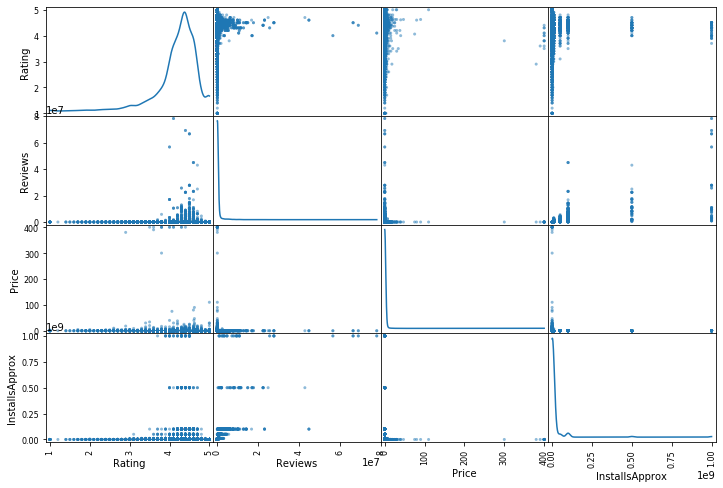

In [31]:
_ = pd.plotting.scatter_matrix(data.loc[:,'Category':'InstallsApprox'], figsize=(12,8), diagonal='kde')

In [32]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,InstallsApprox,lifeSpanCol
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000.0,Safe
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000.0,Safe
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000.0,Safe
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000.0,Safe
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000.0,Safe


### Chi square tests with level of significance = 0.05

## Correlation found between:
##### Ratings and Installs
##### Content Rating and Genres
##### Price and Installs
##### Size and Android Version
##### Ratings and Last Update Date

## No correlation found between:
##### Reviews Number and Last Update Date
##### Ratings and Reviews Number

In [33]:
ct = pd.crosstab(data["Rating"],data["Installs"], margins= False)
st.chi2_contingency(ct)
# There is a correlation between Ratings and Installs

(43763.18695221997,
 0.0,
 900,
 array([[1.03755323e-01, 1.37514518e+00, 2.30274874e+00, 7.58807588e-02,
         5.94657375e-01, 1.59659311e+00, 1.75300039e+00, 1.09794812e+00,
         1.74835463e+00, 5.71428571e-01, 1.26984127e-01, 7.24738676e-01,
         1.05768486e+00, 3.15911731e-01, 7.32481611e-01, 4.21215641e-01,
         5.07936508e-01, 7.99070848e-01, 9.44638018e-02],
        [6.48470770e-03, 8.59465738e-02, 1.43921796e-01, 4.74254743e-03,
         3.71660859e-02, 9.97870693e-02, 1.09562524e-01, 6.86217576e-02,
         1.09272164e-01, 3.57142857e-02, 7.93650794e-03, 4.52961672e-02,
         6.61053039e-02, 1.97444832e-02, 4.57801007e-02, 2.63259775e-02,
         3.17460317e-02, 4.99419280e-02, 5.90398761e-03],
        [1.94541231e-02, 2.57839721e-01, 4.31765389e-01, 1.42276423e-02,
         1.11498258e-01, 2.99361208e-01, 3.28687573e-01, 2.05865273e-01,
         3.27816492e-01, 1.07142857e-01, 2.38095238e-02, 1.35888502e-01,
         1.98315912e-01, 5.92334495e-02, 1.373403

In [34]:
ct = pd.crosstab(data["Content Rating"],data["Genres"], margins= False)
st.chi2_contingency(ct)
# There is a correlation between Content Rating and Genres

(7778.397114161644,
 0.0,
 590,
 array([[1.03368177e-01, 4.35540070e-03, 2.17770035e-02, 3.77468060e-03,
         2.90360046e-04, 5.80720093e-04, 6.32984901e-02, 4.35540070e-03,
         2.90360046e-04, 1.62601626e-02, 5.80720093e-04, 2.03252033e-03,
         5.80720093e-04, 2.46806039e-02, 1.53890825e-02, 1.27758420e-02,
         8.71080139e-04, 4.35540070e-03, 2.90360046e-04, 6.64924506e-02,
         2.90360046e-04, 5.80720093e-04, 1.23693380e-01, 1.39372822e-02,
         5.80720093e-04, 2.90360046e-04, 1.13240418e-02, 5.54587689e-02,
         5.22648084e-03, 3.77468060e-03, 2.03252033e-03, 8.71080139e-04,
         2.90360046e-04, 8.71080139e-03, 1.71312427e-02, 2.90360046e-04,
         1.06271777e-01, 2.90360046e-04, 5.69105691e-02, 1.52148664e-01,
         1.45180023e-03, 1.45180023e-03, 2.03252033e-03, 1.27758420e-02,
         1.16144019e-03, 5.22648084e-03, 1.07433217e-02, 1.16144019e-03,
         1.74216028e-03, 1.45180023e-03, 1.10336818e-02, 4.64576074e-03,
         1.70441347

In [35]:
ct = pd.crosstab(data["Price"],data["Installs"], margins= False)
st.chi2_contingency(ct)
# There is a correlation between Price and Installs

(2673.9535131912257,
 4.4962450549622276e-61,
 1566,
 array([[6.21234998e+01, 8.23368177e+02, 1.37877081e+03, ...,
         3.04126984e+02, 4.78443670e+02, 5.65602013e+01],
        [9.33797909e-01, 1.23763066e+01, 2.07247387e+01, ...,
         4.57142857e+00, 7.19163763e+00, 8.50174216e-01],
        [1.94541231e-02, 2.57839721e-01, 4.31765389e-01, ...,
         9.52380952e-02, 1.49825784e-01, 1.77119628e-02],
        ...,
        [6.48470770e-03, 8.59465738e-02, 1.43921796e-01, ...,
         3.17460317e-02, 4.99419280e-02, 5.90398761e-03],
        [7.13317847e-02, 9.45412311e-01, 1.58313976e+00, ...,
         3.49206349e-01, 5.49361208e-01, 6.49438637e-02],
        [6.48470770e-03, 8.59465738e-02, 1.43921796e-01, ...,
         3.17460317e-02, 4.99419280e-02, 5.90398761e-03]]))

In [36]:
ct = pd.crosstab(data["Size"],data["Android Ver"], margins= False)
st.chi2_contingency(ct)
# There is a correlation between Size and Android Version

(47299.404910892335,
 0.0,
 14592,
 array([[1.35501355e-03, 1.28726287e-02, 7.79132791e-02, ...,
         2.03252033e-03, 4.06504065e-03, 8.26558266e-01],
        [6.19434766e-03, 5.88463027e-02, 3.56174990e-01, ...,
         9.29152149e-03, 1.85830430e-02, 3.77855207e+00],
        [7.74293457e-03, 7.35578784e-02, 4.45218738e-01, ...,
         1.16144019e-02, 2.32288037e-02, 4.72319009e+00],
        ...,
        [1.93573364e-04, 1.83894696e-03, 1.11304684e-02, ...,
         2.90360046e-04, 5.80720093e-04, 1.18079752e-01],
        [7.35578784e-03, 6.98799845e-02, 4.22957801e-01, ...,
         1.10336818e-02, 2.20673635e-02, 4.48703058e+00],
        [2.95199381e-01, 2.80439412e+00, 1.69739644e+01, ...,
         4.42799071e-01, 8.85598142e-01, 1.80071622e+02]]))

In [37]:
ct = pd.crosstab(data["Rating"],data["Reviews"], margins= False)
st.chi2_contingency(ct)
# There is NO correlation between the average Rating for an application and the number of reviews it receives

(179423.1867331252,
 1.0,
 299900,
 array([[8.93534650e-01, 4.19667054e-01, 3.29849013e-01, ...,
         1.54858691e-03, 1.54858691e-03, 1.54858691e-03],
        [5.58459156e-02, 2.62291909e-02, 2.06155633e-02, ...,
         9.67866822e-05, 9.67866822e-05, 9.67866822e-05],
        [1.67537747e-01, 7.86875726e-02, 6.18466899e-02, ...,
         2.90360046e-04, 2.90360046e-04, 2.90360046e-04],
        ...,
        [1.27328688e+01, 5.98025552e+00, 4.70034843e+00, ...,
         2.20673635e-02, 2.20673635e-02, 2.20673635e-02],
        [4.85859466e+00, 2.28193961e+00, 1.79355401e+00, ...,
         8.42044135e-03, 8.42044135e-03, 8.42044135e-03],
        [1.87083817e+01, 8.78677894e+00, 6.90621370e+00, ...,
         3.24235385e-02, 3.24235385e-02, 3.24235385e-02]]))

In [38]:
ct = pd.crosstab(data["Rating"],data["Last Updated"], margins= False)
st.chi2_contingency(ct)
# There is a correlation between the average Rating for an application and the last time it was updated

(83089.69203227722,
 2.0428658609851637e-290,
 68700,
 array([[6.19434766e-03, 6.19434766e-03, 7.74293457e-03, ...,
         1.54858691e-03, 3.09717383e-03, 1.54858691e-03],
        [3.87146729e-04, 3.87146729e-04, 4.83933411e-04, ...,
         9.67866822e-05, 1.93573364e-04, 9.67866822e-05],
        [1.16144019e-03, 1.16144019e-03, 1.45180023e-03, ...,
         2.90360046e-04, 5.80720093e-04, 2.90360046e-04],
        ...,
        [8.82694541e-02, 8.82694541e-02, 1.10336818e-01, ...,
         2.20673635e-02, 4.41347271e-02, 2.20673635e-02],
        [3.36817654e-02, 3.36817654e-02, 4.21022067e-02, ...,
         8.42044135e-03, 1.68408827e-02, 8.42044135e-03],
        [1.29694154e-01, 1.29694154e-01, 1.62117693e-01, ...,
         3.24235385e-02, 6.48470770e-02, 3.24235385e-02]]))

In [39]:
ct = pd.crosstab(data["Reviews"],data["Last Updated"], margins= False)
st.chi2_contingency(ct)
# There is NO correlation between the number of reviews an application has and the last time it was updated

(6310713.940888421,
 1.0,
 8241252,
 array([[2.23383662e-01, 2.23383662e-01, 2.79229578e-01, ...,
         5.58459156e-02, 1.11691831e-01, 5.58459156e-02],
        [1.04916763e-01, 1.04916763e-01, 1.31145954e-01, ...,
         2.62291909e-02, 5.24583817e-02, 2.62291909e-02],
        [8.24622532e-02, 8.24622532e-02, 1.03077816e-01, ...,
         2.06155633e-02, 4.12311266e-02, 2.06155633e-02],
        ...,
        [3.87146729e-04, 3.87146729e-04, 4.83933411e-04, ...,
         9.67866822e-05, 1.93573364e-04, 9.67866822e-05],
        [3.87146729e-04, 3.87146729e-04, 4.83933411e-04, ...,
         9.67866822e-05, 1.93573364e-04, 9.67866822e-05],
        [3.87146729e-04, 3.87146729e-04, 4.83933411e-04, ...,
         9.67866822e-05, 1.93573364e-04, 9.67866822e-05]]))